## Gastos dos deputados estaduais da atual legislatura com gráficas
__Autor:__ Rodolfo Viana<br>
__Data de início:__ 24 de fevereiro de 2018<br>
__Data de término:__ 25 de maio de 2018<br>
__Fonte de dados:__ Transparência da Assembleia Legislativa do Estado de São Paulo<br>
__Coleta de dados:__ Extrações de 24 de fevereiro a 25 de maio de 2018, com script próprio, a partir de arquivo `.xml` fornecido pela fonte<br>
__Arquivo de origem (extraído):__ `alesp_deputados_gastos.csv`<br>
__Ferramentas:__ Python 3.6, Jupyter, Pandas, Numpy, Matplotlib, Seaborn

***

### Histórico de gastos na verba de gabinete

O `.xml` disponibilizado pelo sistema da Alesp traz despesas de deputados a partir de 2002 -- em março daquele ano, entrou em vigor o [Ato da Mesa nº 2](https://www.al.sp.gov.br/norma/?id=234), que instituiu um valor mensal para despesas dos parlamentares e seus gabinetes.

Temos, assim, dados agregados de mais de 15 anos de verba de gabinete. São:
```
- 453.000 notas fiscais
- 284 pessoas que ocuparam uma vaga de deputado estadual
- 42.949 fornecedores
- R$ 309.868.194,63 em despesas
```

Nesse período, a distribuição da verba de gabinete por categoria de despesa foi esta:
```
- Serviço gráfico e xerox: R$ 66.426.271,51 (21,44%)
- Combustível: R$ 40.072.759,25 (12,93%)
- Serviço técnico, consultoria e pesquisa: R$ 38.514.619,26 (12,43%)
- Telefone, água, luz e afins: R$ 35.842.019,56 (11,57%)
- Locação de imóveis: R$ 28.576.834,93 (9,22%)
- Locação e manutenção de bens móveis e imóveis: R$ 19.659.189,49 (6,34%)
- Material de escritório: R$ 17.976.110,78 (5,80%)
- Serviço de comunicação: R$ 16.811.856,89 (5,43%)
- Hospedagem, alimentação e locomoção: R$ 14.973.317,72 (4,83%)
- Manutenção de bens móveis e imóveis: R$ 9.052.432,79 (2,92%)
- Manutenção de veículos e pedágios: R$ 8.770.107,39 (2,83%)
- Locação de bens móveis: R$ 7.566.099,61 (2,44%)
- Assinatura de publicações: R$ 3.331.491,85 (1,08%)
- Moradia: R$ 2.295.083,60 (0,74%)
```

Gráficos mostram que houve alterações nos tipos de despesas ao longo do tempo: alguns foram extintos, outros foram criados... Daí a duplicidade em despesas como locação de bens móveis e imóveis.

In [1]:
# Importação de ferramentas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Leitura de dados
data = pd.read_csv('data/alesp_deputados_gastos.csv',
                   sep = ';',
                   encoding = 'latin-1', 
                   dtype = {'CNPJ': np.str, 
                            'Valor': np.float,
                            'Ano': np.int}, 
                   low_memory = False)

# Primeiros resultados
print(f'Quantidade de registros em análise: {len(data)} \n\
Quantidade de deputados: {data["deputado"].nunique()} \n\
Quantidade de fornecedores: {data["cnpj"].nunique()} \n\
Soma das notas fiscais em análise: R$ {data["valor"].sum()} \n\
Período: {data["ano"].min()}-{data["ano"].max()}')

Quantidade de registros em análise: 453000 
Quantidade de deputados: 284 
Quantidade de fornecedores: 42949 
Soma das notas fiscais em análise: R$ 309868194.62999994 
Período: 2002-2018


In [2]:
# Conversão de 'tipo' em categorias
data['tipo'] = data['tipo'].astype('category')
data['tipo'].cat.categories

# Formatação dos nomes das categorias
data['tipo'].cat.rename_categories([
    'Combustível',
    'Locação e manutenção de bens móveis e imóveis',
    'Manutenção de veículos e pedágios',
    'Serviço gráfico e xerox',
    'Material de escritório',
    'Serviço técnico, consultoria e pesquisa',
    'Assinatura de publicações',
    'Telefone, água, luz e afins',
    'Hospedagem, alimentação e locomoção',
    'Serviço de comunicação',
    'Locação de bens móveis',
    'Locação de imóveis',
    'Manutenção de bens móveis e imóveis',
    'Moradia',
], inplace = True)

# Agrupamento dos gastos por categoria
df_tipo = data.groupby(['tipo']).agg({'valor': sum})\
                                .sort_values('valor', ascending = False)\
                                .reset_index()

# Cálculo de porcentagem de cada categoria no total de gastos
df_tipo['porcentagem'] = (df_tipo['valor'] / df_tipo['valor'].sum()) * 100

# Formatação de números para duas casas decimais
df_tipo['valor'] = df_tipo['valor'].map('{0:.2f}'.format)
df_tipo['porcentagem'] = df_tipo['porcentagem'].map('{0:.2f}'.format)

# Resultado
df_tipo

,tipo,valor,porcentagem
0,Serviço gráfico e xerox,66426271.51,21.44
1,Combustível,40072759.25,12.93
2,"Serviço técnico, consultoria e pesquisa",38514619.26,12.43
3,"Telefone, água, luz e afins",35842019.56,11.57
4,Locação de imóveis,28576834.93,9.22
5,Locação e manutenção de bens móveis e imóveis,19659189.49,6.34
6,Material de escritório,17976110.78,5.80
7,Serviço de comunicação,16811856.89,5.43
8,"Hospedagem, alimentação e locomoção",14973317.72,4.83
9,Manutenção de bens móveis e imóveis,9052432.79,2.92


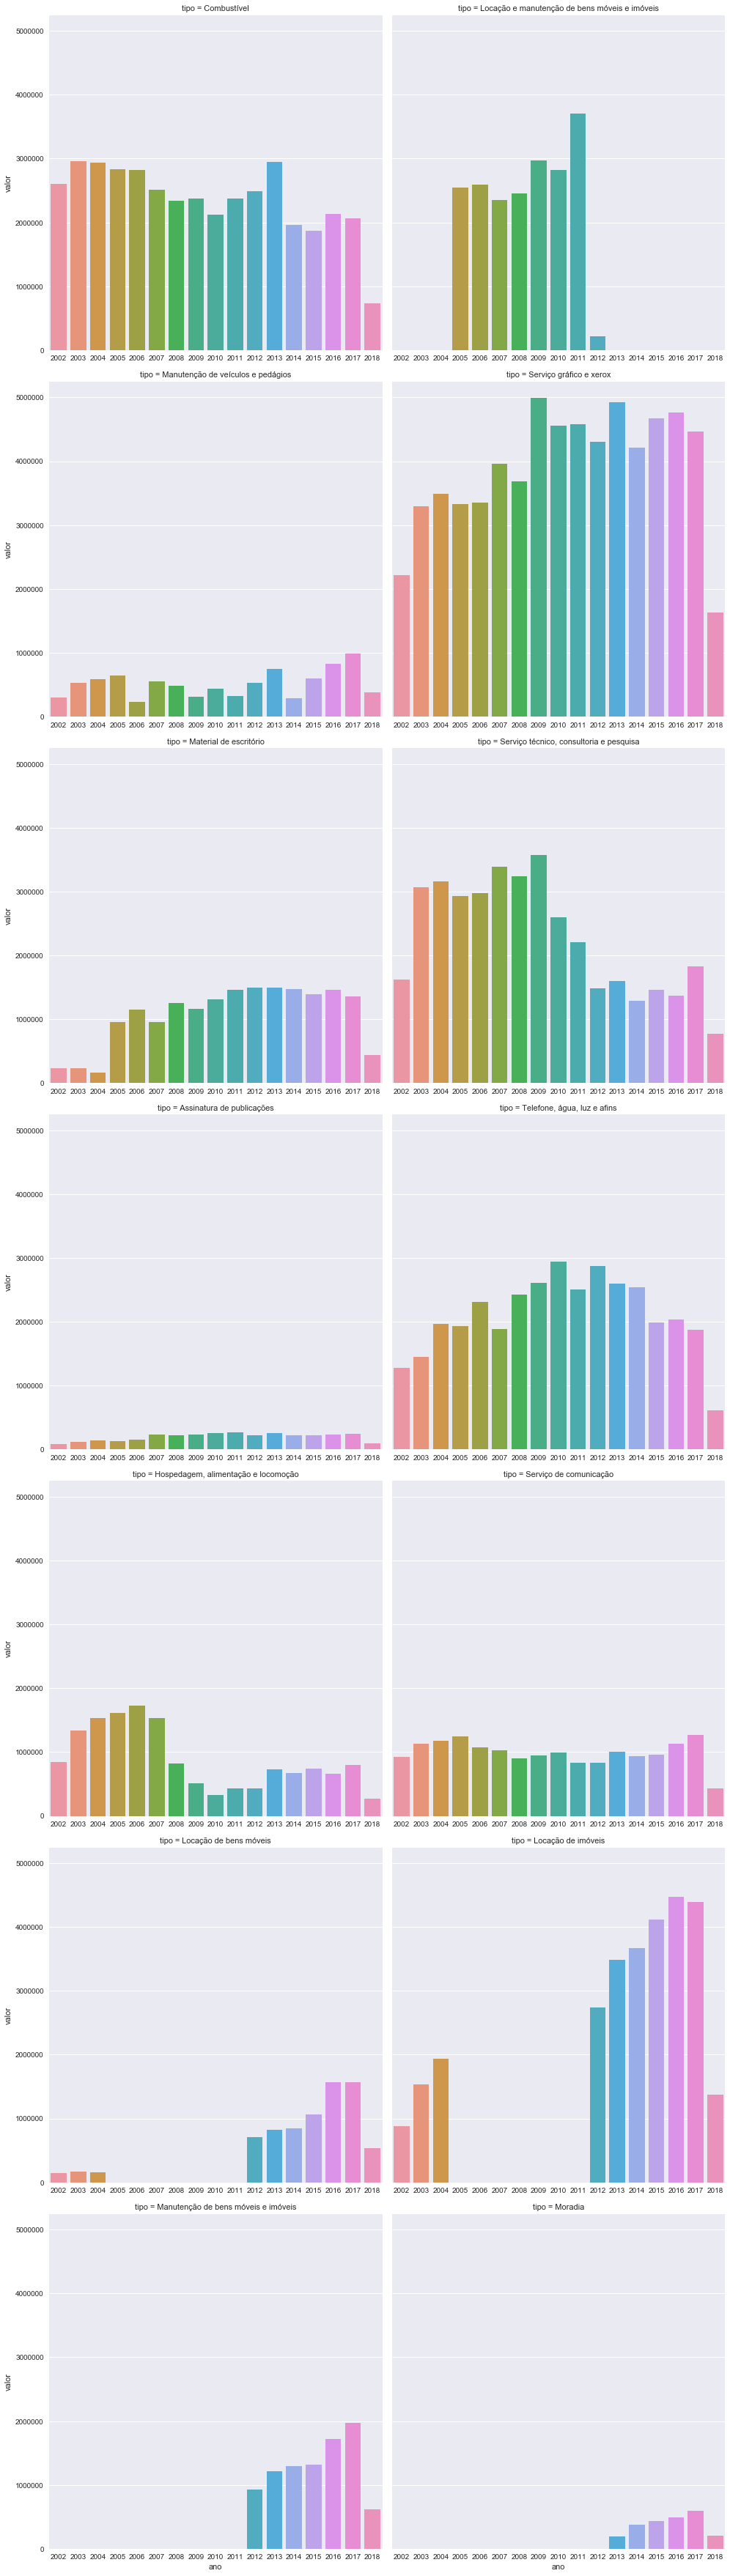

In [3]:
# Preparação do gráfico por tipo e ano
sns.set()
grafico = data.groupby(['tipo', 'ano']).agg({'valor': sum})\
                                       .sort_values('valor', ascending = False)\
                                       .reset_index()
grafico['porcentagem'] = (grafico['valor'] / grafico['valor'].sum()) * 100
grafico.style.format({'porcentagem': '{:,.2f}'.format, 'valor': '{:,.2f}'.format})
sns.factorplot(x='ano', 
               y='valor', 
               col='tipo', 
               data=grafico, 
               col_wrap=2, 
               kind='bar', 
               sharex=False, 
               sharey=True, 
               size=7)

# Resultado
sns.despine()

### Gastos da atual legislatura

O recorte cronológico dos registros (de 2015 até hoje) apresenta o panorama de gastos dos deputados eleitos em 2014. Temos:
```
- 80.667 notas fiscais
- 135 pessoas que ocuparam uma vaga de deputado estadual
- 10.138 fornecedores
- R$ 75.153.909,62 em despesas
```

Devido às alterações nos tipos de despesas no decorrer do tempo, a divisão dos valores sofre mudanças; contudo, 'Serviço gráfico e xerox' permanece no topo dos maiores gastores, com mais de 20%:
```
- Serviço gráfico e xerox: R$ 15.524.858,83 (20,66%)
- Locação de imóveis: R$ 14.335.963,01 (19,08%)
- Combustível: R$ 6.803.838,75 (9,05%)
- Telefone, água, luz e afins: R$ 6.510.220,96 (8,66%)
- Manutenção de bens móveis e imóveis: R$ 5.624.465,23 (7,48%)
- Serviço técnico, consultoria e pesquisa: R$ 5.414.173,82 (7,20%)
- Locação de bens móveis: R$ 4.731.238,18 (6,30%)
- Material de escritório: R$ 4.637.738,48 (6,17%)
- Serviço de comunicação: R$ 3.796.261,31 (5,05%)
- Manutenção de veículos e pedágios: R$ 2.804.414,54 (3,73%)
- Hospedagem, alimentação e locomoção: R$ 2.455.022,90 (3,27%)
- Moradia: R$ 1.725.717,64 (2,30%)
- Assinatura de publicações: R$ 789.995,97 (1,05%)
```

In [4]:
# Recorte para a atual legislatura (de 2015 até agora)
data = data[data['ano'] >= 2015]

# Resultados
print(f'Quantidade de registros em análise: {len(data)} \n\
Quantidade de deputados: {data["deputado"].nunique()} \n\
Quantidade de fornecedores: {data["cnpj"].nunique()} \n\
Soma das notas fiscais em análise: R$ {data["valor"].sum()} \n\
Período: {data["ano"].min()}-{data["ano"].max()}')

Quantidade de registros em análise: 80667 
Quantidade de deputados: 135 
Quantidade de fornecedores: 10138 
Soma das notas fiscais em análise: R$ 75153909.62 
Período: 2015-2018


In [5]:
# Agrupamento dos gastos por categoria
df_tipo = data.groupby(['tipo']).agg({'valor': sum})\
                                .sort_values('valor', ascending = False)\
                                .reset_index()

# Cálculo de porcentagem de cada categoria no total de gastos
df_tipo['porcentagem'] = (df_tipo['valor'] / df_tipo['valor'].sum()) * 100

# Formatação de números para duas casas decimais
df_tipo['valor'] = df_tipo['valor'].map('{0:.2f}'.format)
df_tipo['porcentagem'] = df_tipo['porcentagem'].map('{0:.2f}'.format)

# Resultado
df_tipo

,tipo,valor,porcentagem
0,Serviço gráfico e xerox,15524858.83,20.66
1,Locação de imóveis,14335963.01,19.08
2,Combustível,6803838.75,9.05
3,"Telefone, água, luz e afins",6510220.96,8.66
4,Manutenção de bens móveis e imóveis,5624465.23,7.48
5,"Serviço técnico, consultoria e pesquisa",5414173.82,7.20
6,Locação de bens móveis,4731238.18,6.30
7,Material de escritório,4637738.48,6.17
8,Serviço de comunicação,3796261.31,5.05
9,Manutenção de veículos e pedágios,2804414.54,3.73


### Gastos da atual legislatura com gráficas

Aqui são considerados somente os registros a partir de 2015, na categoria 'Serviço gráfico e xerox'. Temos:
```
- 2.836 notas fiscais em análise
- 130 deputados que efetuaram gastos nesta categoria
- 391 fornecedores
- R$ 15.524.858,83 em gastos
```

Quando observamos a porcentagem recebida por cada fornecedor, notamos que a soma dos 30 primeiros CNPJs se aproxima de 50% do total -- mais especificamente, resulta em 49,46%. A partir dessa percepção, vamos ver quais são as 30 empresas que receberam quase 50% dos R$ 15,5 milhões e quais deputados contrataram seus serviços.

In [6]:
# Recorte para o tipo 'Serviço gráfico e xerox'
data = data[data['tipo'] == 'Serviço gráfico e xerox']

# Resultados
print(f'Quantidade de registros em análise: {len(data)} \n\
Quantidade de deputados: {data["deputado"].nunique()} \n\
Quantidade de fornecedores: {data["cnpj"].nunique()} \n\
Soma das notas fiscais em análise: R$ {data["valor"].sum()} \n\
Período: {data["ano"].min()}-{data["ano"].max()}')

Quantidade de registros em análise: 2836 
Quantidade de deputados: 130 
Quantidade de fornecedores: 391 
Soma das notas fiscais em análise: R$ 15524858.83 
Período: 2015-2018


In [7]:
# Agrupamento por CNPJ ou CPF
df_forn = data.groupby(['cnpj']).agg({'valor': sum})\
                                .sort_values('valor', ascending = False)\
                                .reset_index()

# Cálculo de porcentagem de cada fornecedor
df_forn['porcentagem'] = (df_forn['valor'] / df_forn['valor'].sum()) * 100

# Formatação de números para duas casas decimais
df_forn['valor'] = df_forn['valor'].map('{0:.2f}'.format)
df_forn['porcentagem'] = df_forn['porcentagem'].map('{0:.2f}'.format)

# Resultado
df_forn

,cnpj,valor,porcentagem
0,10350386000115,344266.35,2.22
1,00273211000106,314800.00,2.03
2,00990466000181,308165.00,1.98
3,73116121000177,304000.00,1.96
4,65606055000195,301030.00,1.94
5,13400017000188,300760.00,1.94
6,00651238000187,295420.00,1.90
7,10748852000115,288552.00,1.86
8,03136828000160,286300.00,1.84
9,25217978000130,275784.80,1.78


In [8]:
# Recorte para as 30 empresas
forn_30 = df_forn.iloc[:30,:]

# Seleção das 30 empresas no universo de 391 empresas
top_forn = data['cnpj'].isin(forn_30['cnpj'])
fornecedores = data[top_forn]

# Agrupamento de valores por fornecedor e deputado
fornecedores_grupo = fornecedores.groupby(['cnpj', 'fornecedor', 'deputado'])\
                                 .agg({'valor': sum})

# Resultado
fornecedores_grupo

valor
cnpj           fornecedor                                         deputado                                    
00192198000152 GRAFICA EDITORA PARATODOS LTDA.                    CARLOS CEZAR                       209202.00
00273211000106 EDITORA J G RIO PRETO LTDA ME                      SEBASTIÃO SANTOS                  314800.00
00645965000131 MURC EDITORA GRAFICA LTDA                          MARCOS DAMASIO                     115997.00
               MURC EDITORA GRÃFICA LTDA                         ESTEVAM GALVÃO                     47219.20
               MURC EDITORA GRÃÂFICA LTDA                       LUIZ CARLOS GONDIM                 112320.00
00651238000187 FABRICA SETE GRAFICA E EDITORA LTDA-ME             ENIO TATTO                         295420.00
00990466000181 CROMOGRAF GRAFICA DE PRESIDENTE PRUDENTE           ED THOMAS                          191285.00
               CROMOGRAF GRAFICA DE PRESIDENTE PRUDENTE LTDA -... MAURO BRAGATO                      116880.00
02116505000141 CICERO RICARDO ZAPAROLLI ME                        BETH SAHÃO                        222750.00
02248675000180 VALTER GOMES FRANCA - ME                           ADILSON ROSSI                        6326.00
               VALTER GOMES FRANCA - ME                           ROBERTO ENGLER                     260870.00
02876767000104 GRAFICA CISTIAM LTDA                               MARIA LÃCIA AMARY                 196566.00
03136828000160 MARCO ANTONIO D A AVILA ALVES ME                   JUNIOR APRILLANTI                    6800.00
               MARCO ANTONIO D AVILA                              ABELARDO CAMARINHA                 257000.00
               MARCO ANTONIO D AVILA ALVES ME                     AIRTON GARCIA                       22500.00
03429320000150 C B DOS SANTOS GRAFICA                             CÃSSIO NAVARRO                     25289.70
               C.B DOS SANTOS GRAFICA - ME ART GRAPHICA OFFSET    CAIO FRANÃA                       203266.00
               C.B. DOS SANTOS GRAFICA -ME                        DAVI ZAIA                           17502.00
               C.B.DOS SANTOS GRAFIC ME                           LUCIANO BATISTA                     18472.50
03476115000145 LILIAN CAVALCANTI BITENCOURT DANIEL ME             CARLOS NEDER                       149719.12
                                                                  JOSÃ AMÃRICO                     108960.51
04993387000185 K. M. R. EDITORA LTDA.                             MILTON VIEIRA                      241680.00
               KMR EDITORA LTDA                                   WELLINGTON MOURA                     1150.00
               KMR EDITORA LTDA.                                  ALEXANDRE DA FARMÃCIA              22750.00
06370081000106 JG EDITORA GRAFICA COMPLETA LTDA - EPP             ANTONIO SALIM CURIATI                8930.00
               JG EDITORA GRÃFICA LTDA                           CAUÃ MACRIS                       255360.00
08026465000123 AGB PACK                                           ANA DO CARMO                       256000.00
08711610000105 BUENO & COCATO FOTOS DIGITAIS LTDA - ME            LUIZ TURCO                         194997.00
08948012000154 QUALIGRAF VOTUPORANGA EDITORA LTDA - ME            CARLÃO PIGNATARI                  205155.00
10350386000115 SISTTEM GRAFICA & EDITORA LTDA                     BARROS MUNHOZ                       11700.50
...                                                                                                        ...
               SISTTEM GRAFICA & EDITORA LTDA.                    ITAMAR BORGES                      103679.00
               SISTTEM GRAFICA E EDITORA LTDA                     DELEGADO OLIM                       19817.50
                                                                  JORGE CARUSO                        26565.00
               SISTTEM GRÃFICA &EDITORA LTDA                     CELSO NASCIMENTO                   153727.0

### Próximos passos
```
- Pedir à Alesp, via LAI, as notas fiscais emitidas por essas empresas
- Pedir aos gabinetes, via LAI, cópias dos boletins
```